In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath("..")))
from CS224W_Project import *

In [2]:
# https://stackoverflow.com/questions/35569042/ssl-certificate-verify-failed-with-python3
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from typing import Optional, Literal
import yaml
import math
import networkx as nx
from collections import defaultdict

In [4]:
from CS224W_Project.src.utils.data_utils import *
from CS224W_Project.analysis.plotting import *

## Import Graphs

In [5]:
DATA_PATH = os.path.join(ROOT_DIR, "data")
DATA_PATH

'/Users/sleeper/Desktop/CS 224W/Project/CS224W_Project/data'

In [31]:
adj_mats = {
    dataset: np.load(os.path.join(DATA_PATH, f"adj_mat_{dataset}.npy"))
    for dataset in DATASETS.keys()
}
graphs = {
    dataset: nx.from_numpy_array(adj_mat, create_using=nx.DiGraph)
    for dataset, adj_mat in adj_mats.items()
}
laplacians = {
    dataset: nx.normalized_laplacian_matrix(graph).toarray()
    for dataset, graph in graphs.items()
}

In [32]:
adj_mats_symm = {
    dataset: (adj_mat + adj_mat.T) / 2
    for dataset, adj_mat in adj_mats.items()
}
graphs_symm = {
    dataset: nx.from_numpy_array(adj_mat, create_using=nx.DiGraph)
    for dataset, adj_mat in adj_mats_symm.items()
}
laplacians_symm = {
    dataset: nx.normalized_laplacian_matrix(graph).toarray()
    for dataset, graph in graphs_symm.items()
}

In [9]:
laplacians["metr"].shape, laplacians["pems"].shape

((207, 207), (325, 325))

In [55]:
import torch

## Symmetry test

In [9]:
np.all(adj_mats["metr"] - adj_mats["metr"].T < 1e-3)

False

In [10]:
np.all(adj_mats["pems"] - adj_mats["pems"].T < 1e-3)

False

We can see that the graphs are not symmetric:

In [11]:
adj_mats["metr"][:10, :10].round(2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.39, 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.  ],
       [0.  , 0.72, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.63, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.63, 1.  , 0.  , 0.14, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.89, 0.36, 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [12]:
adj_mats["pems"][:10, :10].round(2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.61, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

## Adjacecy Matrix Graphs

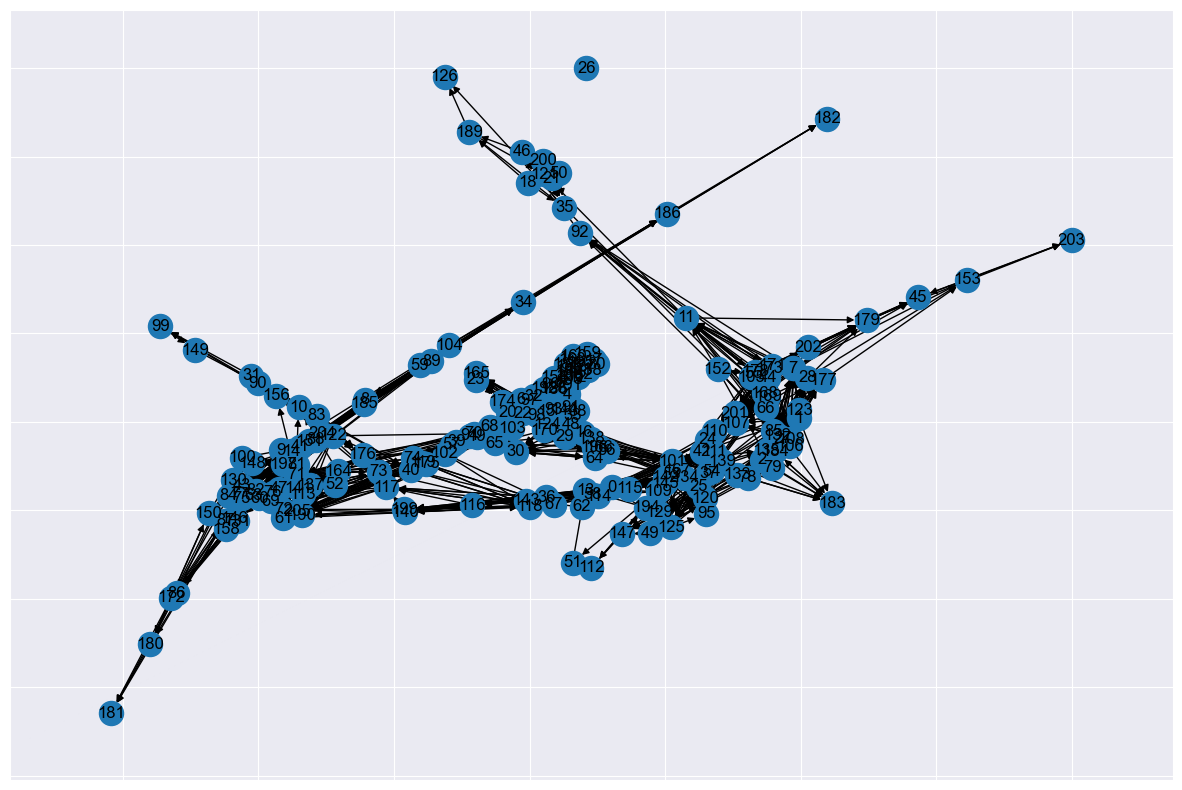

In [90]:
dataset = "metr"
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
nx.draw_networkx(
    nx.from_numpy_array(
        adj_mats[dataset] - np.eye(adj_mats[dataset].shape[0]), 
        create_using=nx.DiGraph
    ), ax=ax)

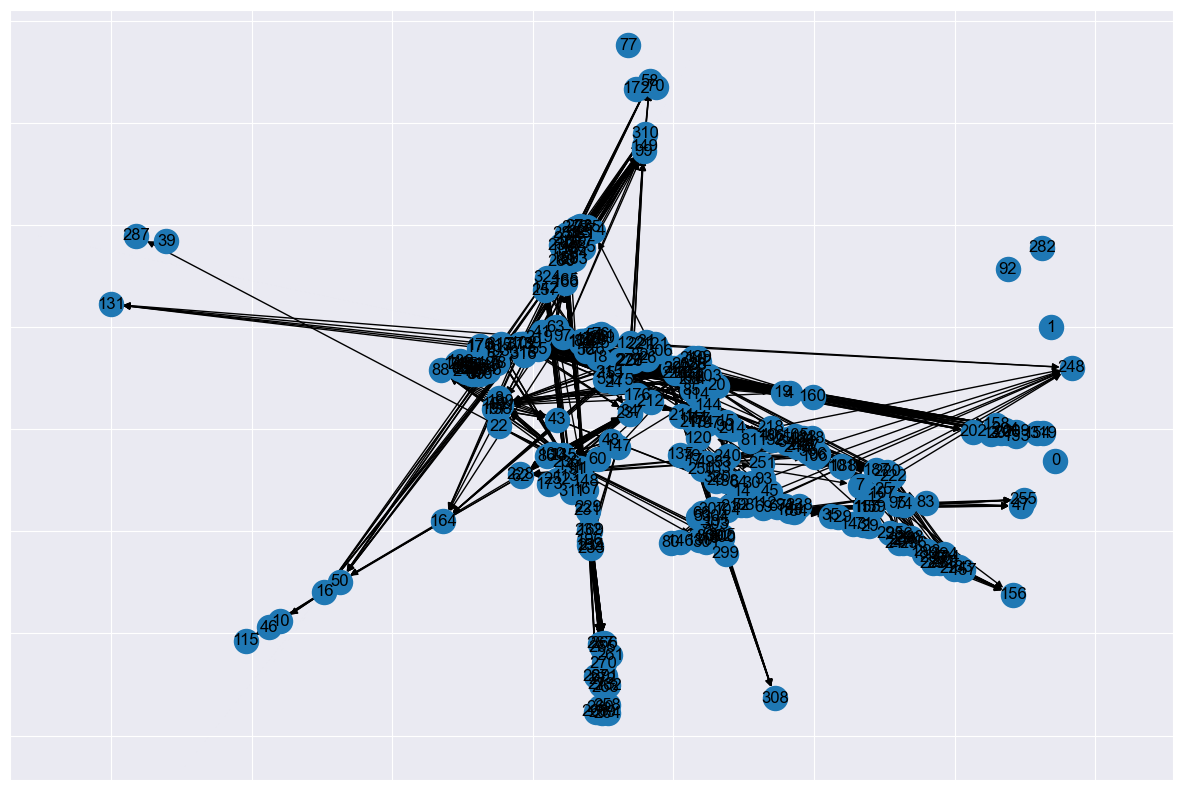

In [91]:
dataset = "pems"
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
nx.draw_networkx(
    nx.from_numpy_array(
        adj_mats[dataset] - np.eye(adj_mats[dataset].shape[0]), 
        create_using=nx.DiGraph
    ), ax=ax)

## Adjacecy Matrix Heatmaps

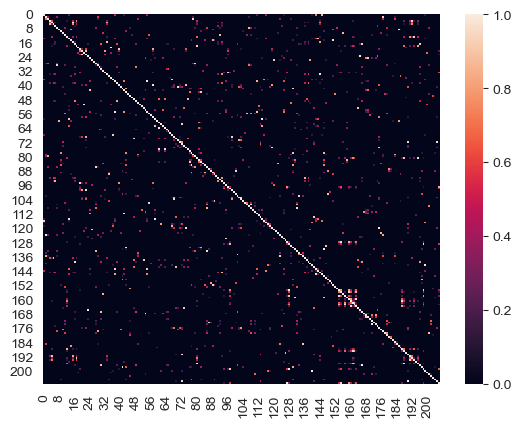

In [13]:
_ = sns.heatmap(adj_mats["metr"])

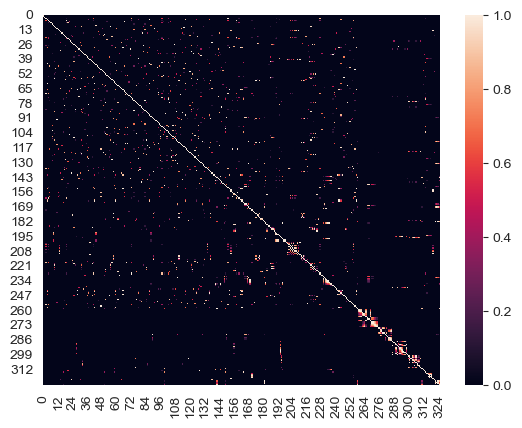

In [14]:
_ = sns.heatmap(adj_mats["pems"])

## Graph Fourier Transform with Eigendecomp on Averaged Laplacian

In [35]:
eig = dict()
for dataset, laplacian in laplacians_symm.items():
    evals, evecs = np.linalg.eig(laplacian)
    idx = evals.argsort()[::-1]
    eig[dataset] = {"evals": evals[idx], "evecs": evecs[:, idx]}

In [47]:
def plot_screeplot(
    vals: np.ndarray, 
    decomp: Literal["svd", "eig"], 
    mat_type: Literal["adj", "lap"] = "lap", 
    dataset: str = None, 
    symmetrized: bool = False,
):
    contribution = np.round(np.cumsum(vals) / vals.sum(), 2)
    quantiles = {p: np.argmax(contribution >= p) for p in {0.5, 0.75, 0.9}}
    ranges = {
        0.5: range(quantiles[0.5] + 1), 
        0.75: range(quantiles[0.5], quantiles[0.75] + 1), 
        0.9: range(quantiles[0.75], quantiles[0.9] + 1)
    }
    alphas = {0.5: 0.5, 0.75: 0.25, 0.9: 0.15}
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    plt.tight_layout()
    ax.plot(range(vals.shape[0]), vals)
    ax.set_xlim(-5, vals.shape[0] + 5)
    ax.set_ylim(-0.015, vals.max() + 0.015)
    ax.set_ylabel("Singular value" if decomp == "svd" else "Eigenvalue")
    ax.set_xlabel("Order")
    for p, range_p in ranges.items():
        ax.fill_between(
            x=ranges[p], 
            y1=0, 
            y2=vals[range_p], 
            alpha=alphas[p], 
            label=f"{int(p * 100): d}% explained"
        )
    ax.legend()
    title = "Scree Plot"
    if decomp == "svd":
        title = "SVD " + title
    if dataset is not None:
        mat_type = "Adjacency Matrix" if mat_type == "adj" else "Laplacian"
        if symmetrized:
            mat_type = "Symmetrized " + mat_type
        title += f" for the {mat_type} of {DATASETS[dataset]}"
    ax.set_title(title)

### Scree plot

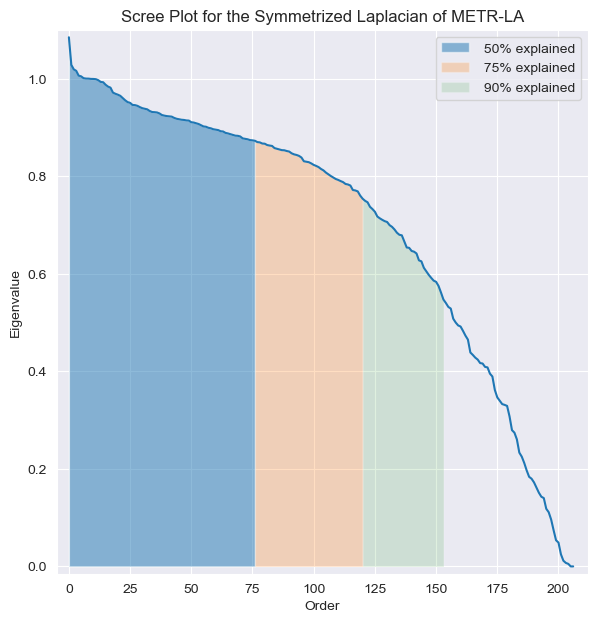

In [48]:
dataset = "metr"
plot_screeplot(eig[dataset]["evals"], decomp="eig", dataset=dataset, symmetrized=True)

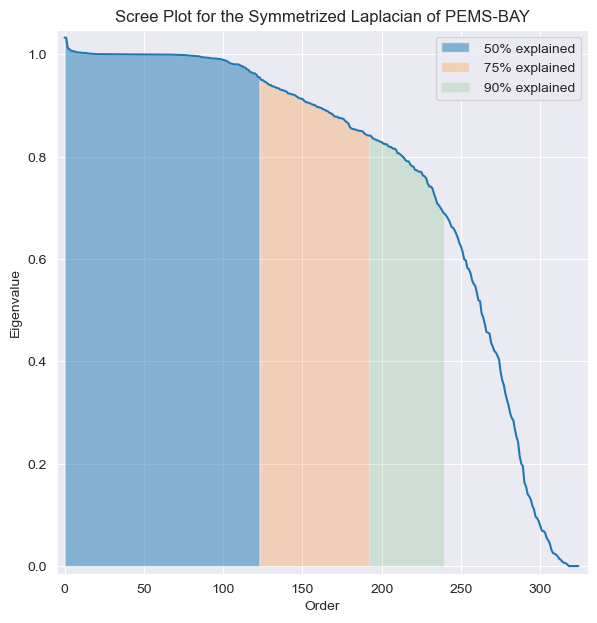

In [50]:
dataset = "pems"
plot_screeplot(eig[dataset]["evals"], decomp="eig", dataset=dataset, symmetrized=True)

## Graph Fourier Transform with SVD

In [15]:
svd = dict()
for dataset, laplacian in laplacians.items():
    svecs_l, svals, svecs_r = np.linalg.svd(laplacian)
    svd[dataset] = {"svals": svals, "svecs_l": svecs_l, "svecs_r": svecs_r.T}

### Scree Plot

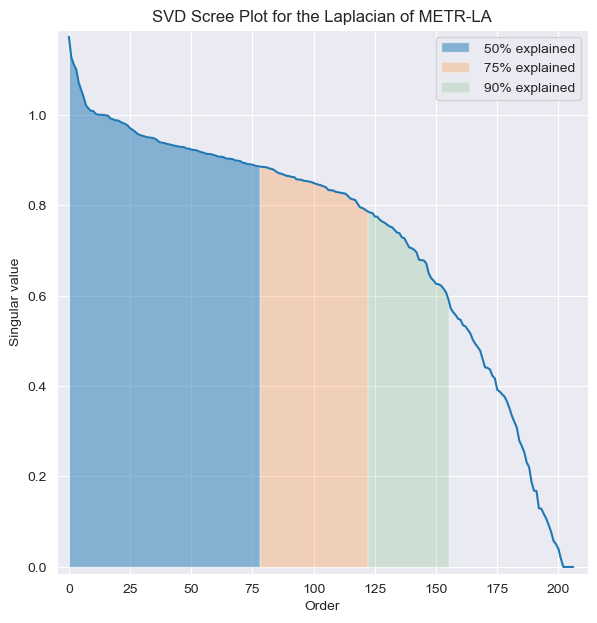

In [51]:
dataset = "metr"
plot_screeplot(svd[dataset]["svals"], decomp="svd", dataset=dataset)

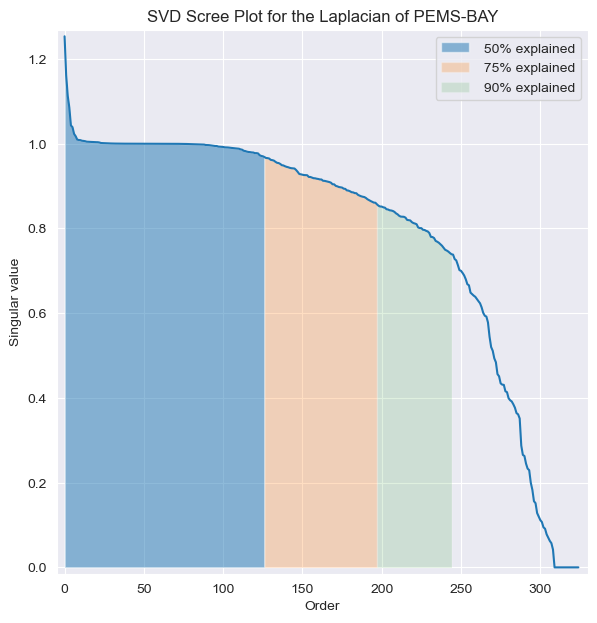

In [52]:
dataset = "pems"
plot_screeplot(svd[dataset]["svals"], decomp="svd", dataset=dataset)

### Graph Fourier Basis

In [29]:
i = 0
dataset = "metr"
num_vecs = 5
legend_loc = 2

In [25]:
def get_ordinal_suffix(num: int) -> str:
    if num == 1:
        return "st"
    elif num == 2:
        return "nd"
    elif num == 3:
        return "rd"
    else:
        return "th"

In [ ]:
def plot_eig_sing_vecs(dataset: Literal["metr", "pems"])

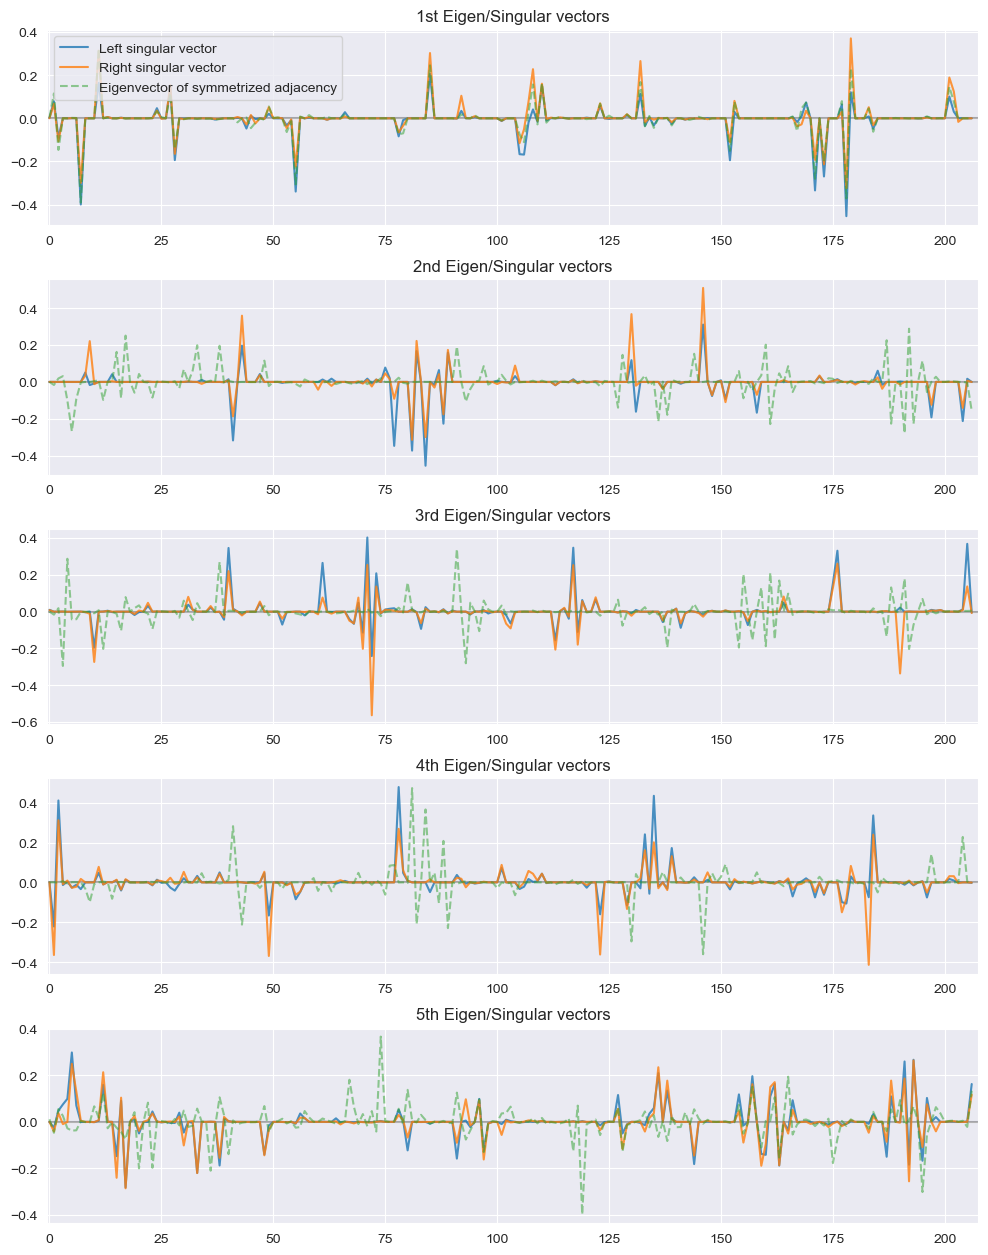

In [30]:
num_nodes = eig[dataset]["evecs"].shape[0]
assert num_nodes == svd[dataset]["svecs_l"].shape[0]
assert num_nodes == svd[dataset]["svecs_r"].shape[0]

_, axs = plt.subplots(nrows=num_vecs, ncols=1, figsize=(10, 2.5 * num_vecs))
plt.tight_layout(h_pad=2, w_pad=1)
for i in range(num_vecs):
    ax = axs[i]
    ax.axhline(y=0, color="black", alpha=0.3)
    svec_l, svec_r = svd[dataset]["svecs_l"][:, i], svd[dataset]["svecs_r"][:, i]
    evec = eig[dataset]["evecs"][:, i]
    if np.trim_zeros(svec_l)[0] < 0:
        svec_l = -svec_l
    if np.trim_zeros(svec_r)[0] < 0:
        svec_r = -svec_r
    if np.trim_zeros(evec)[0] < 0:
        evec = -evec
    ax.plot(range(num_nodes), svec_l, label="Left singular vector", alpha=0.8)
    ax.plot(range(num_nodes), svec_r, label="Right singular vector", alpha=0.8)
    ax.plot(range(num_nodes), evec, label="Eigenvector of symmetrized adjacency", alpha=0.5, linestyle="--")
    ax.set_xlim(-0.5, num_nodes + 0.5)
    if i == 0:
        ax.legend(loc=legend_loc)
    i += 1
    ax.set_title(f"{i}{get_ordinal_suffix(i)} Eigen/Singular vectors")